In [1]:
# 5. With a suitable example demonstrate the perceptron learning law with its decision regions using python. Give the output in graphical form


Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


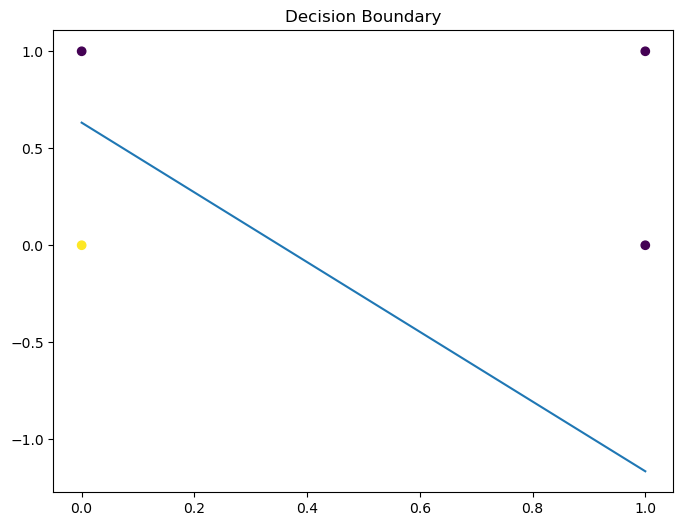

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x > 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

    def plot_decision_region(self, training_inputs, labels):
        # Plotting training data points
        plt.figure(figsize=(8, 6))
        plt.scatter(training_inputs[:, 0], training_inputs[:, 1], c=labels)

        # Plotting decision boundary
        slope = -self.weights[0] / self.weights[1]
        intercept = -self.bias / self.weights[1]
        x = np.linspace(np.min(training_inputs[:, 0]), np.max(training_inputs[:, 0]), 100)
        y = slope * x + intercept
        plt.plot(x, y)

        plt.title('Decision Boundary')
        plt.show()

# Example usage
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([1, 0, 0, 0])

perceptron = perceptron(input_size=2)
perceptron.train(training_inputs, labels)

# Test the trained perceptron
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for inputs in test_inputs:
    print(f"Input: {inputs}, Predicted Output: {perceptron.predict(inputs)}")

# Plot decision region
perceptron.plot_decision_region(training_inputs, labels)


In [3]:
# code2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class Perceptron:
    def __init__(self, lr=0.1, n_iter=100):
        self.lr = lr # learning rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 1
        
        for i in range(self.n_iter):
            for j in range(X.shape[0]):
                pred = self.predict(X[j])
        
                if pred != y[j]:
                    self.weights += self.lr * y[j] * X[j]
                    self.bias += self.lr * y[j]
    
    def predict(self, X):
        output = np.dot(X, self.weights) + self.bias
        return np.where(output >= 0, 1, -1)

In [6]:
x = np.array([[2, 2], [4, 4], [4, 0], [3, 2], [8, 4], [8, 0]])
y = np.array([1, 1, -1, 1, -1, -1])

In [8]:
model = Perceptron()
model.fit(x, y)

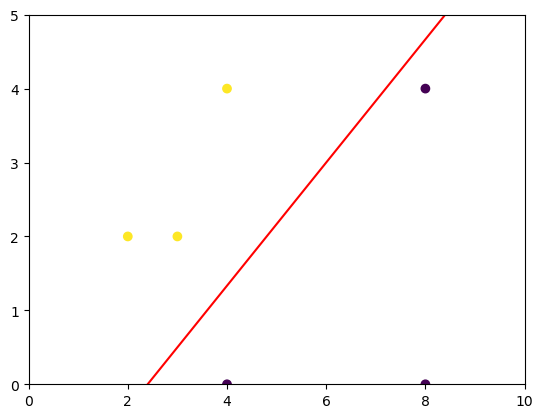

In [10]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlim(0, 10)
plt.ylim(0, 5)
x1 = np.linspace(0, 10)
x2 = -(model.weights[0]*x1 + model.bias)/model.weights[1]
plt.plot(x1, x2, '-r')
plt.show()

In [11]:
# code3

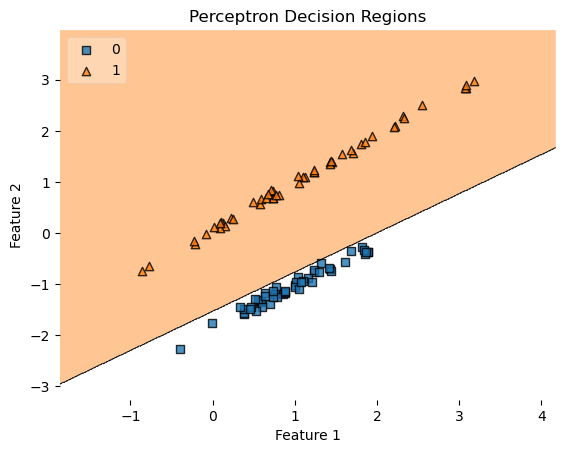

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions

class PerceptronClassifier:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        for _ in range(self.n_iterations):
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Generate random data
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Create and train Perceptron
perceptron = PerceptronClassifier()
perceptron.fit(X, y)

# Plot decision regions
plot_decision_regions(X, y, clf=perceptron, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Regions')
plt.show()
